In [57]:
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

from config import POSTGRES_ADDRESS
from config import POSTGRES_DBNAME
from config import POSTGRES_PORT
from config import POSTGRES_USERNAME
from config import POSTGRES_PASSWORD

In [8]:
#Postgres username, password, and database name

# A long string that contains the necessary Postgres login information
postgres_str = (f'postgresql://{POSTGRES_USERNAME}:{POSTGRES_PASSWORD}@{POSTGRES_ADDRESS}:{POSTGRES_PORT}/{POSTGRES_DBNAME}')
engine = create_engine(postgres_str)
connection = engine.connect()
session = Session(bind = engine)


In [11]:
emps = pd.read_sql("SELECT * FROM employees", connection)
emps.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [12]:
sals = pd.read_sql("SELECT * FROM salaries", connection)
sals.head()

,emp_no,salary,from_date,to_date
0,10001,60117.0,1986-06-26,1987-06-26
1,10002,65828.0,1996-08-03,1997-08-03
2,10003,40006.0,1995-12-03,1996-12-02
3,10004,40054.0,1986-12-01,1987-12-01
4,10005,78228.0,1989-09-12,1990-09-12


In [25]:
titles = pd.read_sql('select * from titles', connection)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [31]:
emp_x_sal = pd.merge(emps,sals, on = 'emp_no')
emp_info = pd.merge(emp_x_sal,titles, on = 'emp_no')

emp_info = emp_info[['emp_no', 'salary', 'title']]
emp_info

,emp_no,salary,title
0,10001,60117.0,Senior Engineer
1,10002,65828.0,Staff
2,10003,40006.0,Senior Engineer
3,10004,40054.0,Engineer
4,10004,40054.0,Senior Engineer
5,10005,78228.0,Senior Staff
6,10005,78228.0,Staff
7,10006,40000.0,Senior Engineer
8,10007,56724.0,Senior Staff
9,10007,56724.0,Staff


In [16]:
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000]
labels = ['< $10,000', '$10,000 - $20,000', '$20,000 - $30,000', '$30,000 - $40,000' , '$40,000 - $50,000' , \
            '$50,000 - $60,000', '$60,000 - $70,000', '$70,000 - $80,000', '$80,000 - $90,000', \
          '$90,000 - $100,000', '$100,000 - $110,000', '$110,000 - $120,000', '$120,000 - $130,000']

In [33]:
emp_info["Salary Summary"] = pd.cut(emp_info["salary"], bins, labels=labels)
emp_info.head()

,emp_no,salary,title,Salary Summary
0,10001,60117.0,Senior Engineer,"$60,000 - $70,000"
1,10002,65828.0,Staff,"$60,000 - $70,000"
2,10003,40006.0,Senior Engineer,"$40,000 - $50,000"
3,10004,40054.0,Engineer,"$40,000 - $50,000"
4,10004,40054.0,Senior Engineer,"$40,000 - $50,000"


(array([2.23562e+05, 7.94690e+04, 6.08090e+04, 4.05500e+04, 2.31940e+04,
        1.07420e+04, 3.72600e+03, 1.02000e+03, 2.10000e+02, 2.60000e+01]),
 array([ 40000. ,  48949.2,  57898.4,  66847.6,  75796.8,  84746. ,
         93695.2, 102644.4, 111593.6, 120542.8, 129492. ]),
 <a list of 10 Patch objects>)

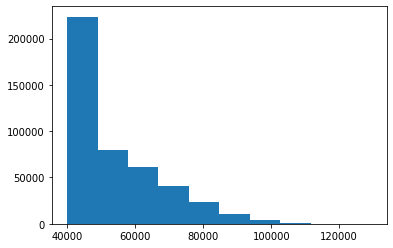

In [34]:
# Histogram of salary ranges
plt.hist(emp_info['salary'], bins=10)

In [48]:
sal_grp = emp_info.groupby(['title'])['salary'].mean()
sal_grp = pd.DataFrame(sal_grp).reset_index()
sal_grp

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


<module 'matplotlib.pyplot' from '/Users/maxwellpatterson/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

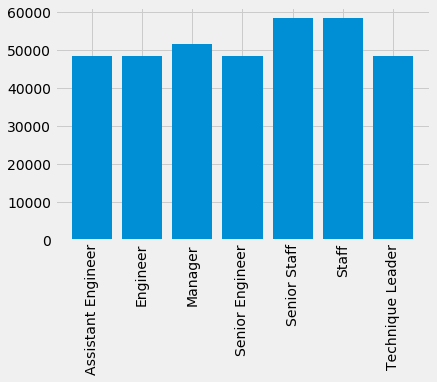

In [56]:
plt.bar(sal_grp['title'], sal_grp['salary'])
plt.xticks(rotation='vertical')
plt